<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Copy_of_United_States_Airline_Analysis_Anand_Divakaran1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
According to air travel consumer reports, a large proportion of consumer complaints are
about frequent flight delays. Of all the complaints received from consumers about airline
services, 32% were related to cancellations, delays, or other deviations from the airlines’
schedules.
Unavoidable delays can be caused by air traffic, no passengers at the airport, weather
conditions, mechanical issues, passengers coming from delayed connecting flights, security
clearance, and aircraft preparation.

Objective:
The objective of this project is to identify the factors that contribute to avoidable flight delays.
You are also required to build a model to predict if the flight will be delayed.

In [4]:
#install additional packages
!pip install pyjanitor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
#Import python packages
#Data Processing
import pandas as pd
import missingno as msno
import janitor
import re
from datetime import datetime, date

#Linear Algebra
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Statistical Analysis
import scipy.stats as stats

#Webscraping
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 1. Import and aggregate data
1.A Collect information related to flights, airports (e.g., type of airport and elevation), and runways
(e.g., length_ft, width_ft, surface, and number of runways). Gather all fields you believe might cause
avoidable delays in one dataset.
Hint: In this case, you would have to determine the keys to join the tables. A data description will be
useful.

In [6]:
airport_data = pd.read_excel('airports.xlsx')
runway_data = pd.read_excel('runways.xlsx')
airline_data = pd.read_excel('Airlines.xlsx')
dict_data = pd.read_excel('datadictionary.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
dict_data = pd.read_excel('datadictionary.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
runway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43977 entries, 0 to 43976
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         43977 non-null  int64  
 1   airport_ref                43977 non-null  int64  
 2   airport_ident              43977 non-null  object 
 3   length_ft                  43753 non-null  float64
 4   width_ft                   41088 non-null  float64
 5   surface                    43518 non-null  object 
 6   lighted                    43977 non-null  int64  
 7   closed                     43977 non-null  int64  
 8   le_ident                   43793 non-null  object 
 9   le_latitude_deg            15016 non-null  float64
 10  le_longitude_deg           15000 non-null  float64
 11  le_elevation_ft            12781 non-null  float64
 12  le_heading_degT            14624 non-null  float64
 13  le_displaced_threshold_ft  2883 non-null   flo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           518556 non-null  int64 
 1   Airline      518556 non-null  object
 2   Flight       518556 non-null  int64 
 3   AirportFrom  518556 non-null  object
 4   AirportTo    518556 non-null  object
 5   DayOfWeek    518556 non-null  int64 
 6   Time         518556 non-null  int64 
 7   Length       518556 non-null  int64 
 8   Delay        518556 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 35.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
airline_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


Identify the number of runways in the airport from the runway dataset.

In [12]:
runway_count = runway_data.groupby('airport_ident')[['id']].count().sort_values(by='id',ascending=False).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
runway_count.rename(columns={"airport_ident": "ident"},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Merge the runway_count data frame with the airport_data frame

In [14]:
airport_df0 = airport_data.merge(runway_count, on='ident', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
airport_df0.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_x,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,id_y
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN,1.0
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN,1.0
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN,1.0
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR,1.0


In [16]:
airport_df0.rename(columns={"id_x": "id","id_y":"runway_count"},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
airport_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73805 entries, 0 to 73804
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 73805 non-null  int64  
 1   ident              73805 non-null  object 
 2   type               73805 non-null  object 
 3   name               73805 non-null  object 
 4   latitude_deg       73805 non-null  float64
 5   longitude_deg      73805 non-null  float64
 6   elevation_ft       59683 non-null  float64
 7   continent          38086 non-null  object 
 8   iso_country        73546 non-null  object 
 9   iso_region         73805 non-null  object 
 10  municipality       68739 non-null  object 
 11  scheduled_service  73805 non-null  object 
 12  gps_code           42996 non-null  object 
 13  iata_code          9160 non-null   object 
 14  local_code         32975 non-null  object 
 15  home_link          3492 non-null   object 
 16  wikipedia_link     107

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
airport_df1 = airport_df0[['iata_code','type','elevation_ft','runway_count']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
airport_df1.dropna(subset=['iata_code'],inplace=True)
airport_df1['iata_code'] = airport_df1['iata_code'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-064f3260c8bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_df1.dropna(subset=['iata_code'],inplace=True)
<ipython-input-19-064f3260c8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
airport_df1[airport_df1['iata_code']=='DFW']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,iata_code,type,elevation_ft,runway_count
34733,DFW,large_airport,607.0,7.0


1.B. When it comes to on-time arrivals, different airlines perform differently based on the amount of
experience they have. The major airlines in this field include US Airways Express (founded in
1967), Continental Airlines (founded in 1934), and Express Jet (founded in 1986). Pull such
information specific to various airlines from the given Wikipedia page link.
https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States.
Hint: Here, you should use web scraping to learn how long an airline has been operating for

In [21]:
url = "https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States#State-run_airlines"
response = pd.read_html(url)
list_tables = []
for index in range(0,7):
  table = response[index][['IATA','Founded']]
  df = pd.DataFrame(table)
  list_tables.append(df)
airline_founded = pd.concat(list_tables)
airline_founded.reset_index(inplace=True)
airline_founded.dropna(inplace=True)
airline_founded.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
airline_founded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,IATA,Founded
0,AS,1932.0
1,G4,1997.0
2,AA,1926.0
3,XP,1987.0
4,MX,2018.0
...,...,...
126,KH,1982.0
127,5X,1988.0
128,UJ,1994.0
130,KD,2013.0


In [23]:
airline_founded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,IATA,Founded
0,AS,1932.0
1,G4,1997.0
2,AA,1926.0
3,XP,1987.0
4,MX,2018.0


1.D. The total passenger traffic may also contribute to flight delays. The term hub refers to busy
commercial airports. Large hubs are airports that account for at least 1 percent of the total
passenger enplanements in the United States. Airports that account for 0.25 percent to 1
percent of total passenger enplanements are considered medium hubs. Pull passenger traffic
data from the Wikipedia page given below using web scraping and collate it in a table.
https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

In [24]:
traffic_url = "https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States"
response = pd.read_html(traffic_url)
list_tables = []
for index in range(1,3):
  table = response[index][['IATA Code','2022[2]']]
  df = pd.DataFrame(table)
  if index == 1:
    df['hub_type'] = 'large hub'
  else:
    df['hub_type'] = 'medium hub'
  list_tables.append(df)
traffic_final = pd.concat(list_tables)
traffic_final.reset_index(inplace=True)
traffic_final.columns
traffic_final.dropna(subset=["IATA Code"],inplace=True)
traffic_final.rename(columns={"IATA Code":"iata_code","2022[2]":"traffic"},inplace=True)
traffic_final['iata_code'] = traffic_final['iata_code'].str.strip()
traffic_final.drop(['index'], axis=1,inplace=True)
traffic_final

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,iata_code,traffic,hub_type
0,ATL,45396001,large hub
1,DFW,35345138,large hub
2,DEN,33773832,large hub
3,ORD,33120474,large hub
4,LAX,32326616,large hub
...,...,...,...
60,BOI,2230467,medium hub
61,OMA,2204395,medium hub
62,MEM,2163692,medium hub
63,RIC,4068689,medium hub


1.C You should then get all the information gathered so far in one place.

In [25]:
airport_df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,iata_code,type,elevation_ft,runway_count
231,UTK,small_airport,4.0,1.0
465,OCA,small_airport,8.0,1.0
630,PQS,small_airport,305.0,1.0
709,CSE,small_airport,8980.0,1.0
1134,JCY,small_airport,1515.0,1.0
...,...,...,...,...
73795,SHE,large_airport,198.0,1.0
73796,ZYA,closed,1997.0,NaN
73797,YNJ,medium_airport,624.0,1.0
73798,YKH,medium_airport,NaN,1.0


In [26]:
traffic_final

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,iata_code,traffic,hub_type
0,ATL,45396001,large hub
1,DFW,35345138,large hub
2,DEN,33773832,large hub
3,ORD,33120474,large hub
4,LAX,32326616,large hub
...,...,...,...
60,BOI,2230467,medium hub
61,OMA,2204395,medium hub
62,MEM,2163692,medium hub
63,RIC,4068689,medium hub


In [27]:
airport_final= airport_df1.merge(traffic_final, on='iata_code', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
airport_final[airport_final['iata_code']=='FAI']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,iata_code,type,elevation_ft,runway_count,traffic,hub_type
5809,FAI,large_airport,439.0,4.0,NaN,NaN


In [29]:
airline_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [30]:
airline_df1= airline_data.merge(airport_final,left_on='AirportFrom', right_on='iata_code', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
airline_df1[airline_df1['AirportFrom']=='FAI']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,iata_code,type,elevation_ft,runway_count,traffic,hub_type
20,21,AS,128,FAI,SEA,3,80,206,0,FAI,large_airport,439.0,4.0,NaN,NaN
238,240,AS,62,FAI,ANC,3,360,70,0,FAI,large_airport,439.0,4.0,NaN,NaN
2304,2386,AS,55,FAI,SCC,3,460,71,1,FAI,large_airport,439.0,4.0,NaN,NaN
2637,2723,AS,182,FAI,ANC,3,480,63,0,FAI,large_airport,439.0,4.0,NaN,NaN
3538,3650,AS,124,FAI,SEA,3,525,225,1,FAI,large_airport,439.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510682,531114,AS,184,FAI,ANC,5,720,64,0,FAI,large_airport,439.0,4.0,NaN,NaN
514501,535082,AS,188,FAI,ANC,5,945,60,0,FAI,large_airport,439.0,4.0,NaN,NaN
516045,536700,AS,190,FAI,ANC,5,1050,62,0,FAI,large_airport,439.0,4.0,NaN,NaN
516612,537294,AS,51,FAI,BRW,5,1088,87,1,FAI,large_airport,439.0,4.0,NaN,NaN


In [32]:
airline_df1.rename(columns={"runway_count":"src_runwaycount","traffic":"src_traffic","type":"src_type","hub_type":"src_hubtype","elevation_ft":"src_elevation","iata_code":"src_iata"},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
airline_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               518556 non-null  int64  
 1   Airline          518556 non-null  object 
 2   Flight           518556 non-null  int64  
 3   AirportFrom      518556 non-null  object 
 4   AirportTo        518556 non-null  object 
 5   DayOfWeek        518556 non-null  int64  
 6   Time             518556 non-null  int64  
 7   Length           518556 non-null  int64  
 8   Delay            518556 non-null  int64  
 9   src_iata         518525 non-null  object 
 10  src_type         518525 non-null  object 
 11  src_elevation    518525 non-null  float64
 12  src_runwaycount  518525 non-null  float64
 13  src_traffic      434970 non-null  float64
 14  src_hubtype      434970 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 59.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
airline_df1= airline_df1.merge(airport_final,left_on='AirportTo', right_on='iata_code', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
airline_df1.rename(columns={"runway_count":"dest_runwaycount","traffic":"dest_traffic","type":"dest_type","hub_type":"dest_hubtype","elevation_ft":"dest_elevation","iata_code":"dest_iata"},inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
airline_df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,src_iata,...,src_elevation,src_runwaycount,src_traffic,src_hubtype,dest_iata,dest_type,dest_elevation,dest_runwaycount,dest_traffic,dest_hubtype
0,1,CO,269,SFO,IAH,3,15,205,1,SFO,...,13.0,4.0,20411420.0,large hub,IAH,large_airport,97.0,5.0,19814052.0,large hub
1,2,US,1558,PHX,CLT,3,15,222,1,PHX,...,1135.0,3.0,21852586.0,large hub,CLT,large_airport,748.0,4.0,23100300.0,large hub
2,3,AA,2400,LAX,DFW,3,20,165,1,LAX,...,125.0,4.0,32326616.0,large hub,DFW,large_airport,607.0,7.0,35345138.0,large hub
3,4,AA,2466,SFO,DFW,3,20,195,1,SFO,...,13.0,4.0,20411420.0,large hub,DFW,large_airport,607.0,7.0,35345138.0,large hub
4,5,AS,108,ANC,SEA,3,30,202,0,ANC,...,152.0,3.0,2604308.0,medium hub,SEA,large_airport,433.0,4.0,22157862.0,large hub


In [37]:
airline_df1.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                518556 non-null  int64  
 1   Airline           518556 non-null  object 
 2   Flight            518556 non-null  int64  
 3   AirportFrom       518556 non-null  object 
 4   AirportTo         518556 non-null  object 
 5   DayOfWeek         518556 non-null  int64  
 6   Time              518556 non-null  int64  
 7   Length            518556 non-null  int64  
 8   Delay             518556 non-null  int64  
 9   src_iata          518525 non-null  object 
 10  src_type          518525 non-null  object 
 11  src_elevation     518525 non-null  float64
 12  src_runwaycount   518525 non-null  float64
 13  src_traffic       434970 non-null  float64
 14  src_hubtype       434970 non-null  object 
 15  dest_iata         518525 non-null  object 
 16  dest_type         51

In [38]:
airline_df1= airline_df1.merge(airline_founded,left_on='Airline', right_on='IATA', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
airline_df1.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                518556 non-null  int64  
 1   Airline           518556 non-null  object 
 2   Flight            518556 non-null  int64  
 3   AirportFrom       518556 non-null  object 
 4   AirportTo         518556 non-null  object 
 5   DayOfWeek         518556 non-null  int64  
 6   Time              518556 non-null  int64  
 7   Length            518556 non-null  int64  
 8   Delay             518556 non-null  int64  
 9   src_iata          518525 non-null  object 
 10  src_type          518525 non-null  object 
 11  src_elevation     518525 non-null  float64
 12  src_runwaycount   518525 non-null  float64
 13  src_traffic       434970 non-null  float64
 14  src_hubtype       434970 non-null  object 
 15  dest_iata         518525 non-null  object 
 16  dest_type         51

In [40]:
airline_df2 = airline_df1[['Airline','AirportFrom','AirportTo','DayOfWeek','Time','Length','src_type','src_elevation','src_runwaycount','src_traffic','dest_type','dest_elevation','dest_runwaycount','dest_traffic','Founded','Delay']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
airline_final = airline_df2.rename(columns={"Airline":"airline","AirportFrom":"src_airport","AirportTo":"dest_airport","DayOfWeek":"dayofweek","Time":"flight_time","Length":"flight_duration","Founded":"airline_founded","Delay":"delay"})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
airline_final.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,airline,src_airport,dest_airport,dayofweek,flight_time,flight_duration,src_type,src_elevation,src_runwaycount,src_traffic,dest_type,dest_elevation,dest_runwaycount,dest_traffic,airline_founded,delay
0,CO,SFO,IAH,3,15,205,large_airport,13.0,4.0,20411420.0,large_airport,97.0,5.0,19814052.0,NaN,1
1,US,PHX,CLT,3,15,222,large_airport,1135.0,3.0,21852586.0,large_airport,748.0,4.0,23100300.0,NaN,1
2,AA,LAX,DFW,3,20,165,large_airport,125.0,4.0,32326616.0,large_airport,607.0,7.0,35345138.0,1926.0,1
3,AA,SFO,DFW,3,20,195,large_airport,13.0,4.0,20411420.0,large_airport,607.0,7.0,35345138.0,1926.0,1
4,AS,ANC,SEA,3,30,202,large_airport,152.0,3.0,2604308.0,large_airport,433.0,4.0,22157862.0,1932.0,0


In [43]:
airline_final.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           518556 non-null  object 
 1   src_airport       518556 non-null  object 
 2   dest_airport      518556 non-null  object 
 3   dayofweek         518556 non-null  int64  
 4   flight_time       518556 non-null  int64  
 5   flight_duration   518556 non-null  int64  
 6   src_type          518525 non-null  object 
 7   src_elevation     518525 non-null  float64
 8   src_runwaycount   518525 non-null  float64
 9   src_traffic       434970 non-null  float64
 10  dest_type         518525 non-null  object 
 11  dest_elevation    518525 non-null  float64
 12  dest_runwaycount  518525 non-null  float64
 13  dest_traffic      435020 non-null  float64
 14  airline_founded   434955 non-null  float64
 15  delay             518556 non-null  int64  
dtypes: float64(7), int64

In [44]:
airline_final.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


airline                 0
src_airport             0
dest_airport            0
dayofweek               0
flight_time             0
flight_duration         0
src_type               31
src_elevation          31
src_runwaycount        31
src_traffic         83586
dest_type              31
dest_elevation         31
dest_runwaycount       31
dest_traffic        83536
airline_founded     83601
delay                   0
dtype: int64

# 2. You should then examine the missing values in each field, perform missing value treatment, and justify your actions.

In [45]:
airline_final.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           518556 non-null  object 
 1   src_airport       518556 non-null  object 
 2   dest_airport      518556 non-null  object 
 3   dayofweek         518556 non-null  int64  
 4   flight_time       518556 non-null  int64  
 5   flight_duration   518556 non-null  int64  
 6   src_type          518525 non-null  object 
 7   src_elevation     518525 non-null  float64
 8   src_runwaycount   518525 non-null  float64
 9   src_traffic       434970 non-null  float64
 10  dest_type         518525 non-null  object 
 11  dest_elevation    518525 non-null  float64
 12  dest_runwaycount  518525 non-null  float64
 13  dest_traffic      435020 non-null  float64
 14  airline_founded   434955 non-null  float64
 15  delay             518556 non-null  int64  
dtypes: float64(7), int64

In [46]:
airline_final.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


airline                 0
src_airport             0
dest_airport            0
dayofweek               0
flight_time             0
flight_duration         0
src_type               31
src_elevation          31
src_runwaycount        31
src_traffic         83586
dest_type              31
dest_elevation         31
dest_runwaycount       31
dest_traffic        83536
airline_founded     83601
delay                   0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

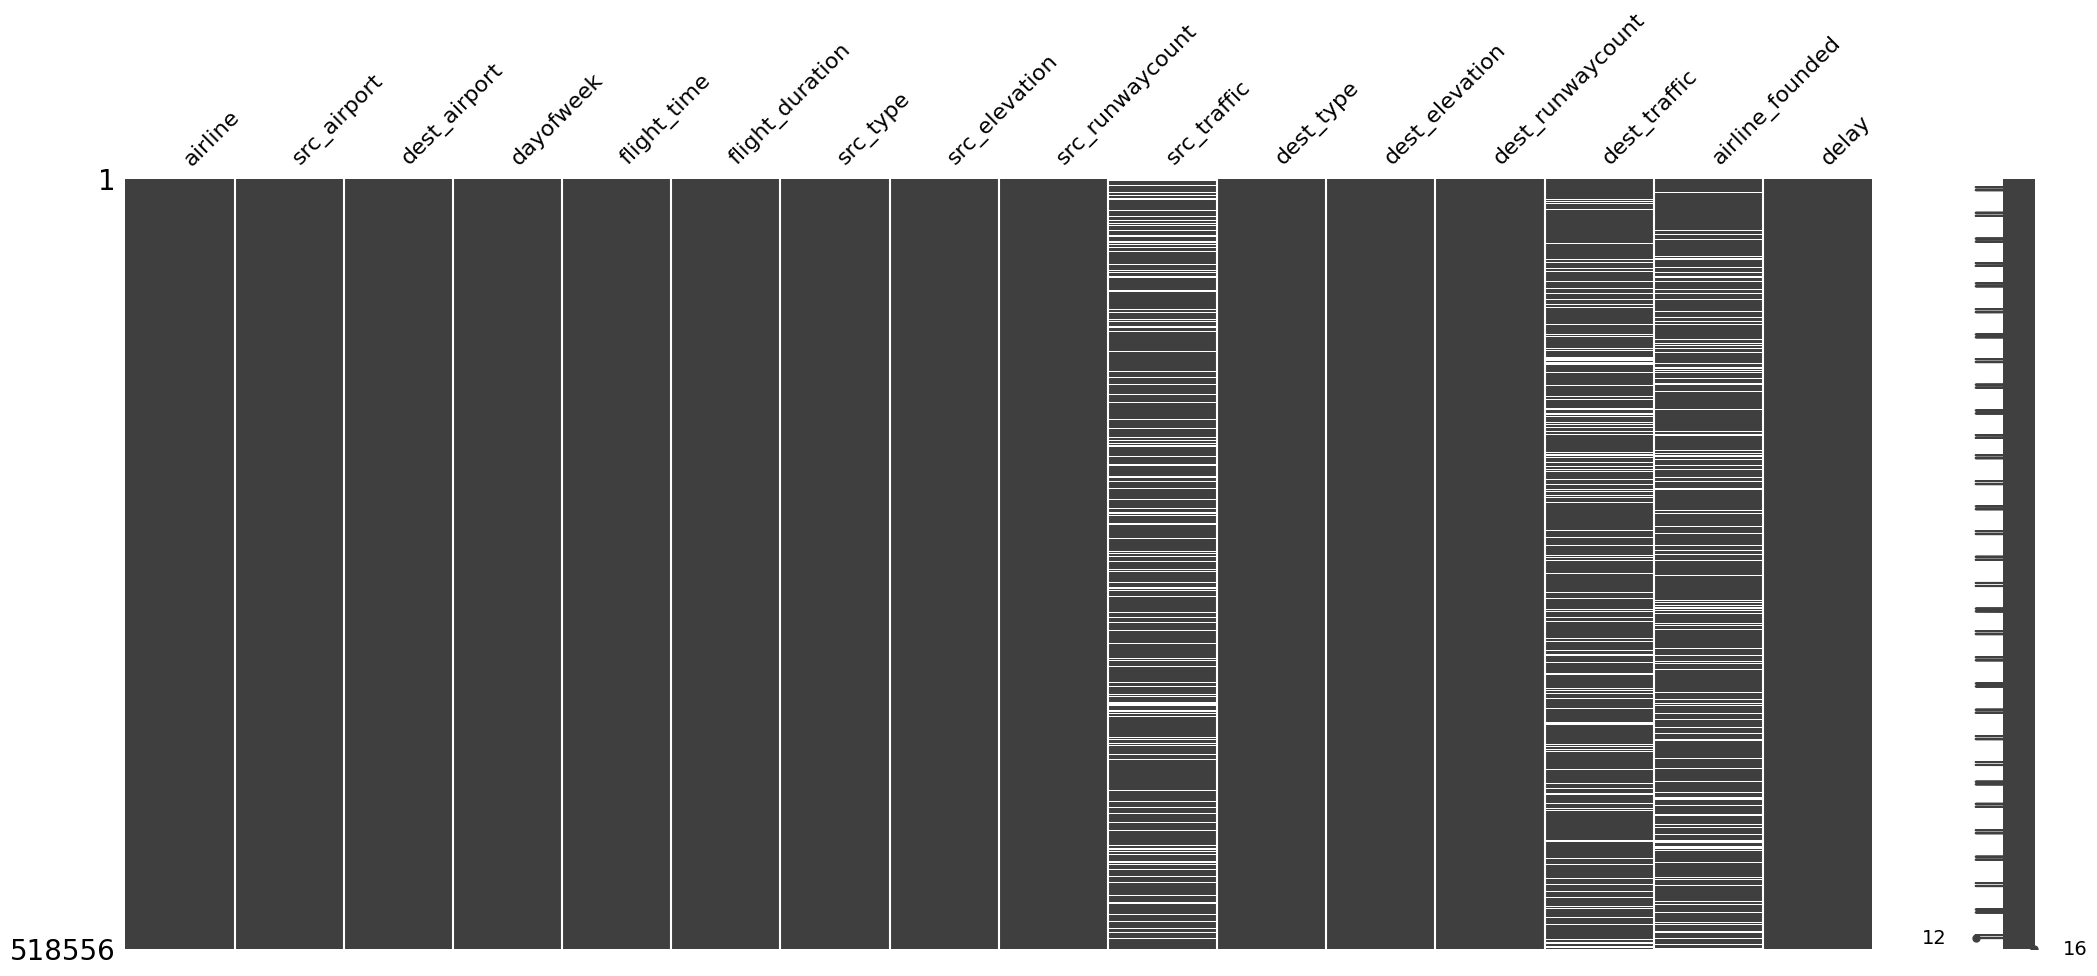

In [47]:
msno.matrix(airline_final)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

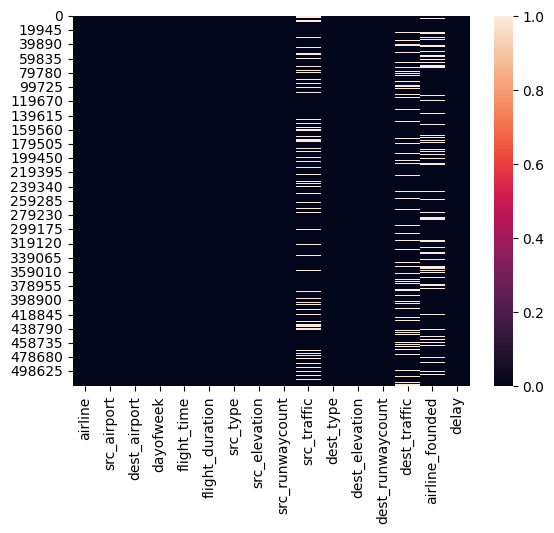

In [48]:
#identify missing data using seaborn heatmap
sns.heatmap(airline_final.isnull())

Identify the destination airports for which the elevation, runway count are null.

In [49]:
airline_final[airline_final['dest_elevation'].isnull()].dest_airport.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CYS'], dtype=object)

Identify the source airports for which the elevation, runway count are null.

In [50]:
airline_final[airline_final['src_elevation'].isnull()].src_airport.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CYS'], dtype=object)

The only airport for which the elevation & runway count are null is CYS - Cheyenne Regional Jerry Olson Field. Obtain the elevation and runway count from google and update the data.

Elevation = 6,160 FT, runway count = 2, airport type = small

In [51]:
airline_final.loc[(airline_final["dest_airport"] == 'CYS'), "dest_elevation"] =  6160
airline_final.loc[(airline_final["dest_airport"] == 'CYS'), "dest_runwaycount"] =  2
airline_final.loc[(airline_final["dest_airport"] == 'CYS'), "dest_type"] =  "small_airport"

airline_final.loc[(airline_final["src_airport"] == 'CYS'), "src_elevation"] =  6160
airline_final.loc[(airline_final["src_airport"] == 'CYS'), "src_runwaycount"] =  2
airline_final.loc[(airline_final["src_airport"] == 'CYS'), "src_type"] =  "small_airport"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
airline_final.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


airline                 0
src_airport             0
dest_airport            0
dayofweek               0
flight_time             0
flight_duration         0
src_type                0
src_elevation           0
src_runwaycount         0
src_traffic         83586
dest_type               0
dest_elevation          0
dest_runwaycount        0
dest_traffic        83536
airline_founded     83601
delay                   0
dtype: int64

In [53]:
airline_final[airline_final['airline_founded'].isnull()].airline.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CO', 'US', 'EV'], dtype=object)

CO-Continental Airlines is now a part of United Airlines. Update the founded year to that of United Airlines<br>
US-initially US Airway Express.  There was a US Airways Express, which now has the symbol OH, and the new name is PSA. Update the founded year to that of PSA.<br>
EV - Expressjet

Obtained the founding year from google.
US - 1962
EV - 1987
CO - 1934


In [54]:
airline_final.loc[(airline_final["airline"] == 'CO'), "airline_founded"] =  1934
airline_final.loc[(airline_final["airline"] == 'US'), "airline_founded"] =  1962
airline_final.loc[(airline_final["airline"] == 'EV'), "airline_founded"] =  1987

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
airline_final.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


airline                 0
src_airport             0
dest_airport            0
dayofweek               0
flight_time             0
flight_duration         0
src_type                0
src_elevation           0
src_runwaycount         0
src_traffic         83586
dest_type               0
dest_elevation          0
dest_runwaycount        0
dest_traffic        83536
airline_founded         0
delay                   0
dtype: int64

In [56]:
airline_final[airline_final['src_traffic'].isnull()].src_airport.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['FAI', 'BQN', 'PSE', 'BIS', 'IYK', 'GFK', 'GSO', 'LMT', 'DLH',
       'FAR', 'MFE', 'VPS', 'MAF', 'LWS', 'RST', 'ALB', 'DSM', 'MSN',
       'PNS', 'BHM', 'LIT', 'SAV', 'ICT', 'ECP', 'DHN', 'MGM', 'CAE',
       'PWM', 'ACV', 'EKO', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'CHA', 'LRD', 'BRO',
       'CRP', 'LAN', 'PVD', 'FWA', 'OKC', 'ORF', 'AEX', 'SYR', 'SHV',
       'VLD', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL', 'EAU', 'ERI', 'BUF',
       'AGS', 'ABI', 'GRR', 'LBB', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF',
       'AZO', 'ABE', 'SWF', 'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH',
       'TUL', 'COS', 'ELP', 'ROC', 'SDF', 'ABY', 'TRI', 'XNA', 'ROA',
       'MLI', 'LYH', 'EVV', 'HPN', 'FAY', 'EWN', 'CSG', 'GPT', 'MLU',
       'MOB', 'OAJ', 'CHO', 'ILM', 'BMI', 'JAN', 'CID', 'GRK', 'CRW',
       'HTS', 'PSC', 'SBP', 'CLD', 'PSP', 'SBA', 'MRY', 'GEG', 'RDD',
       'PAH', 'CMX', 'SPI', 'EUG', 'CIC', 'PIH', 'SGU', 'COD', 'MHT',
       'GRB', 'FSD',

In [57]:
print(f"Number of airports missing traffic data:{len(airline_final[airline_final['src_traffic'].isnull()].src_airport.unique())}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of airports missing traffic data:226


Find the median traffic from the traffic data set

In [58]:
traffic_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iata_code  65 non-null     object
 1   traffic    65 non-null     int64 
 2   hub_type   65 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
median_traffic = traffic_final['traffic'].median()
print(f"Median Traffic:{median_traffic}")

Median Traffic:7241882.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
airline_final.loc[(airline_final.src_traffic.isnull()), "src_traffic"] = median_traffic
airline_final.loc[(airline_final.dest_traffic.isnull()), "dest_traffic"] = median_traffic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
airline_final.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


airline             0
src_airport         0
dest_airport        0
dayofweek           0
flight_time         0
flight_duration     0
src_type            0
src_elevation       0
src_runwaycount     0
src_traffic         0
dest_type           0
dest_elevation      0
dest_runwaycount    0
dest_traffic        0
airline_founded     0
delay               0
dtype: int64

Add the age of the airline

In [62]:
def airline_age(year_founded):
  year_now = datetime.now().year
  return (year_now-year_founded)

airline_final['airline_age'] = airline_final['airline_founded'].apply(airline_age)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
airline_final.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,airline,src_airport,dest_airport,dayofweek,flight_time,flight_duration,src_type,src_elevation,src_runwaycount,src_traffic,dest_type,dest_elevation,dest_runwaycount,dest_traffic,airline_founded,delay,airline_age
0,CO,SFO,IAH,3,15,205,large_airport,13.0,4.0,20411420.0,large_airport,97.0,5.0,19814052.0,1934.0,1,90.0
1,US,PHX,CLT,3,15,222,large_airport,1135.0,3.0,21852586.0,large_airport,748.0,4.0,23100300.0,1962.0,1,62.0
2,AA,LAX,DFW,3,20,165,large_airport,125.0,4.0,32326616.0,large_airport,607.0,7.0,35345138.0,1926.0,1,98.0
3,AA,SFO,DFW,3,20,195,large_airport,13.0,4.0,20411420.0,large_airport,607.0,7.0,35345138.0,1926.0,1,98.0
4,AS,ANC,SEA,3,30,202,large_airport,152.0,3.0,2604308.0,large_airport,433.0,4.0,22157862.0,1932.0,0,92.0


# 3. Perform data visualization and share your insights on the following points:<br>


3a. According to the data provided, approximately 70% of Southwest Airlines flights are delayed. Compare it with other airlines' data by visualizing it.

In [64]:
def total_flight(airline):
  return(airline_final[(airline_final["airline"] == airline)]['airline'].count())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
airline_delay = airline_final.groupby('airline')['delay'].sum().sort_values(ascending=False).reset_index()
airline_delay.rename(columns={'delay':'total_delayed'},inplace=True)
airline_delay['total_count'] = airline_delay['airline'].apply(total_flight)
airline_delay['percentage_delay'] = round((airline_delay['total_delayed']/airline_delay['total_count'])*100,2)
airline_delay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,airline,total_delayed,total_count,percentage_delay
0,WN,65657,94097,69.78
1,DL,27452,60940,45.05
2,OO,22760,50254,45.29
3,AA,17736,45656,38.85
4,MQ,12742,36605,34.81
5,CO,11957,21118,56.62
6,XE,11795,31126,37.89
7,US,11591,34500,33.60
8,EV,11255,27983,40.22
9,UA,8946,27619,32.39


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='airline', ylabel='total_count'>

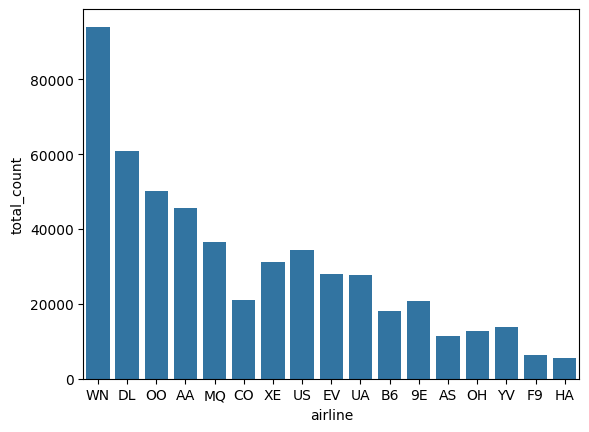

In [66]:
sns.barplot(data=airline_delay,x='airline',y='total_count',errorbar=None)

The dataset is kind of unbalaned by airlines - we have more data for Southwest when compared to other airlines.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='airline', ylabel='percentage_delay'>

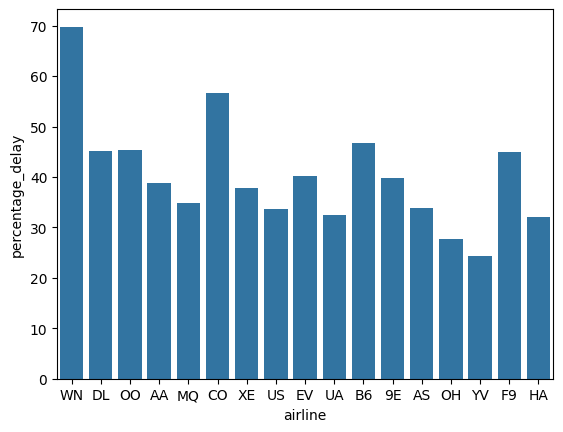

In [67]:
sns.barplot(data=airline_delay,x='airline',y='percentage_delay',errorbar=None)

Maximum muner of delays is found for Southwest - WN

3b. Flights were delayed on various weekdays. Which day of the week is the safest for travel?

In [68]:
def total_flight1(dayofweek):
  return(airline_final[(airline_final["dayofweek"] == dayofweek)]['dayofweek'].count())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
weekly_delay = airline_final.groupby('dayofweek')['delay'].sum().sort_values(ascending=False).reset_index()
weekly_delay.rename(columns={'delay':'delay_count'},inplace=True)
weekly_delay['total_count'] = weekly_delay['dayofweek'].apply(total_flight1)
weekly_delay['percentage_delay'] = round((weekly_delay['delay_count']/weekly_delay['total_count'])*100,2)
weekly_delay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dayofweek,delay_count,total_count,percentage_delay
0,3,41144,86478,47.58
1,4,40280,87988,45.78
2,5,34813,81797,42.56
3,1,33059,70008,47.22
4,2,31072,68721,45.21
5,7,30761,67210,45.77
6,6,22860,56354,40.56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='dayofweek', ylabel='percentage_delay'>

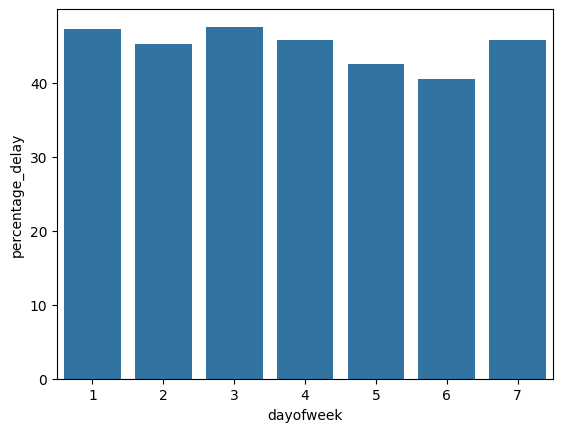

In [70]:
sns.barplot(data=weekly_delay,x='dayofweek',y='percentage_delay',errorbar=None)

Friday and Saturday are the days with minumum delays.

3c. Which airlines should be recommended for short, medium, and long-distance travel?

In [71]:
airline_final.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['airline', 'src_airport', 'dest_airport', 'dayofweek', 'flight_time',
       'flight_duration', 'src_type', 'src_elevation', 'src_runwaycount',
       'src_traffic', 'dest_type', 'dest_elevation', 'dest_runwaycount',
       'dest_traffic', 'airline_founded', 'delay', 'airline_age'],
      dtype='object')

In [72]:
distance_type_df = airline_final[['airline','flight_duration','delay']]
distance_type_df['duration_type'] = pd.cut(distance_type_df.flight_duration,3,labels=['short','medium','long'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-72-5521e114b3b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_type_df['duration_type'] = pd.cut(distance_type_df.flight_duration,3,labels=['short','medium','long'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
q= distance_type_df.groupby(['airline','duration_type'])['delay'].count().reset_index()
q['total_delays'] = distance_type_df.groupby(['airline','duration_type'])['delay'].sum().reset_index()['delay']
q['percent_delay'] = (q['total_delays']/q['delay'])*100
q.fillna(0,axis=1,inplace=True)
q.drop(columns=['delay','total_delays'],inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
def delay_percent(x):
    return round(x.sum()/x.size*100,2)
duration_grp = distance_type_df.groupby(['airline', 'duration_type'])['delay'].apply(delay_percent).reset_index().pivot(index = 'airline', columns = 'duration_type').fillna(0)['delay']
x = duration_grp.reset_index()
x

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


duration_type,airline,short,medium,long
0,9E,39.77,0.00,0.00
1,AA,37.62,43.25,60.40
2,AS,32.58,38.17,0.00
3,B6,45.70,51.05,0.00
4,CO,52.88,64.96,66.87
5,DL,43.88,50.24,48.62
6,EV,40.22,50.00,0.00
7,F9,45.03,43.56,0.00
8,HA,30.16,40.48,0.00
9,MQ,34.82,27.42,0.00


In [155]:
x[x.short == x.short.min()]['airline']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16    YV
Name: airline, dtype: object

In [154]:
print(f"Airline with minumum delays for short flights:{p}")
print(f"Airline with minumum delays for medium flights:")
print(f"Airline with minumum delays for long flights:")



Airline with minumum delays for short flights:16    YV
Name: airline, dtype: object
Airline with minumum delays for medium flights:
Airline with minumum delays for long flights:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
q.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['airline', 'duration_type', 'percent_delay'], dtype='object')

 3d. Do you notice any patterns in the departure times of long-duration flights?

In [115]:
q.pivot(index = 'airline', columns = 'duration_type')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


delay               total_delays               percent_delay  \
duration_type  long medium  short         long medium  short          long   
airline                                                                      
9E                0      0  20686            0      0   8226             0   
AA              149   9336  36171           90   4038  13608     60.402685   
AS                0   2772   8699            0   1058   2834             0   
B6                0   3391  14721            0   1731   6728             0   
CO              166   6349  14603          111   4124   7722      66.86747   
DL              109  11149  49682           53   5601  21798     48.623853   
EV                0     10  27973            0      5  11250             0   
F9                0    551   5905            0    240   2659             0   
HA                0   1003   4575            0    406   1380             0   
MQ                0     62  36543            0     17  12725             0   
OH                0    125  12505            0     49   3453             0   
OO                0    264  49990            0    140  22620             0   
UA              135   9327  18157           53   3460   5433     39.259259   
US                0   6437  28063            0   2621   8970             0   
WN                0   7311  86786            0   5674  59983             0   
XE                0     54  31072            0     29  11766             0   
YV                0     58  13667            0     15   3319             0   

                                     
duration_type     medium      short  
airline                              
9E                     0  39.766025  
AA             43.251928  37.621299  
AS             38.167388  32.578457  
B6             51.046889  45.703417  
CO             64.955111  52.879545  
DL             50.237689  43.875045  
EV                  50.0  40.217352  
F9             43.557169  45.029636  
HA             40.478564  30.163934  
MQ             27.419355  34.821991  
OH                  39.2  27.612955  
OO             53.030303   45.24905  
UA             37.096601  29.922344  
US             40.717726  31.963796  
WN             77.609082  69.115986  
XE             53.703704   37.86689  
YV             25.862069  24.284774

# 4. How many flights were delayed at large hubs compared to medium hubs? Use appropriate visualization to represent your findings.



# 5. Use hypothesis testing strategies to discover:


5a.If the airport's altitude has anything to do with flight delays for incoming and departing flights


H0 - The altitiude of airport has nothing to do with flight delays. <br>
H1 - The altitude of airport has an impact on the flight delays

Source Airports

In [157]:
s1 = airline_final[airline_final['delay'] == 0]['src_elevation']
s2 = airline_final[airline_final['delay'] == 1]['src_elevation']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
t,p = stats.ttest_ind(s1,s2)
if p <0.05:
  result = "Reject null hypothesis"
else:
  result = "Fail to reject null hypothesis"
print(result)

Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Destination Airports

In [162]:
s1 = airline_final[airline_final['delay'] == 0]['dest_elevation']
s2 = airline_final[airline_final['delay'] == 1]['dest_elevation']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
t,p = stats.ttest_ind(s1,s2)
if p <0.05:
  result = "Reject null hypothesis"
else:
  result = "Fail to reject null hypothesis"
print(result)

Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The elevation of the souurce and destination airports plays an important role in the delay of flights.

5b. If the number of runways at an airport affects flight delays


H0:Number of runways does not pay a role in flight delays<br>
H1:Number or runways plays a role in the delay of flights

Source Airports

In [165]:
s1 = airline_final[airline_final['delay'] == 0]['src_runwaycount']
s2 = airline_final[airline_final['delay'] == 1]['src_runwaycount']
t,p = stats.ttest_ind(s1,s2)
if p <0.05:
  result = "Reject null hypothesis"
else:
  result = "Fail to reject null hypothesis"
print(result)

Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Destination Airports

In [166]:
s1 = airline_final[airline_final['delay'] == 0]['dest_runwaycount']
s2 = airline_final[airline_final['delay'] == 1]['dest_runwaycount']
t,p = stats.ttest_ind(s1,s2)
if p <0.05:
  result = "Reject null hypothesis"
else:
  result = "Fail to reject null hypothesis"
print(result)

Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number or runways plays a role in the delay of flights

5c.If the duration of a flight (length) affects flight delays


H0:Duration of flights does not play a role in the flight delays<br>
H1:Duration of flights play a role in the flight delays

In [168]:
s1 = airline_final[airline_final['delay'] == 0]['flight_duration']
s2 = airline_final[airline_final['delay'] == 1]['flight_duration']
t,p = stats.ttest_ind(s1,s2)
if p <0.05:
  result = "Reject null hypothesis"
else:
  result = "Fail to reject null hypothesis"
print(result)

Reject null hypothesis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Duration of flights play a role in the flight delays

# 6. Find the correlation matrix between the flight delay predictors, create a heatmap to visualize this and share your findings


In [169]:
airline_final.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           518556 non-null  object 
 1   src_airport       518556 non-null  object 
 2   dest_airport      518556 non-null  object 
 3   dayofweek         518556 non-null  int64  
 4   flight_time       518556 non-null  int64  
 5   flight_duration   518556 non-null  int64  
 6   src_type          518556 non-null  object 
 7   src_elevation     518556 non-null  float64
 8   src_runwaycount   518556 non-null  float64
 9   src_traffic       518556 non-null  float64
 10  dest_type         518556 non-null  object 
 11  dest_elevation    518556 non-null  float64
 12  dest_runwaycount  518556 non-null  float64
 13  dest_traffic      518556 non-null  float64
 14  airline_founded   518556 non-null  float64
 15  delay             518556 non-null  int64  
 16  airline_age       51

In [185]:
airline_df = airline_final.drop(columns=['airline_founded'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [186]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           518556 non-null  object 
 1   src_airport       518556 non-null  object 
 2   dest_airport      518556 non-null  object 
 3   dayofweek         518556 non-null  int64  
 4   flight_time       518556 non-null  int64  
 5   flight_duration   518556 non-null  int64  
 6   src_type          518556 non-null  object 
 7   src_elevation     518556 non-null  float64
 8   src_runwaycount   518556 non-null  float64
 9   src_traffic       518556 non-null  float64
 10  dest_type         518556 non-null  object 
 11  dest_elevation    518556 non-null  float64
 12  dest_runwaycount  518556 non-null  float64
 13  dest_traffic      518556 non-null  float64
 14  delay             518556 non-null  int64  
 15  airline_age       518556 non-null  float64
dtypes: float64(7), int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
airline_num_col = airline_df.select_dtypes(include=['float64','int64']).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
airline_df[airline_num_col].corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,dayofweek,flight_time,flight_duration,src_elevation,src_runwaycount,src_traffic,dest_elevation,dest_runwaycount,dest_traffic,delay,airline_age
dayofweek,1.000000,0.001035,0.013222,0.001421,-0.000040,0.004611,0.001239,-0.000412,0.004322,-0.025481,0.005208
flight_time,0.001035,1.000000,-0.020844,0.013614,0.091841,0.120656,-0.009837,-0.116307,-0.121161,0.149537,-0.004274
flight_duration,0.013222,-0.020844,1.000000,-0.090078,0.050654,0.113605,-0.054747,0.090036,0.167301,0.040618,0.337413
src_elevation,0.001421,0.013614,-0.090078,1.000000,0.088684,0.133136,0.243123,-0.017168,-0.018614,0.010678,-0.023942
src_runwaycount,-0.000040,0.091841,0.050654,0.088684,1.000000,0.602732,-0.017924,-0.215959,-0.233133,0.029935,0.099152
src_traffic,0.004611,0.120656,0.113605,0.133136,0.602732,1.000000,-0.020630,-0.231444,-0.238945,0.014206,0.178115
dest_elevation,0.001239,-0.009837,-0.054747,0.243123,-0.017924,-0.020630,1.000000,0.088561,0.133071,0.012130,-0.023747
dest_runwaycount,-0.000412,-0.116307,0.090036,-0.017168,-0.215959,-0.231444,0.088561,1.000000,0.602798,-0.061595,0.098099
dest_traffic,0.004322,-0.121161,0.167301,-0.018614,-0.233133,-0.238945,0.133071,0.602798,1.000000,-0.054860,0.177506
delay,-0.025481,0.149537,0.040618,0.010678,0.029935,0.014206,0.012130,-0.061595,-0.054860,1.000000,0.000044


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


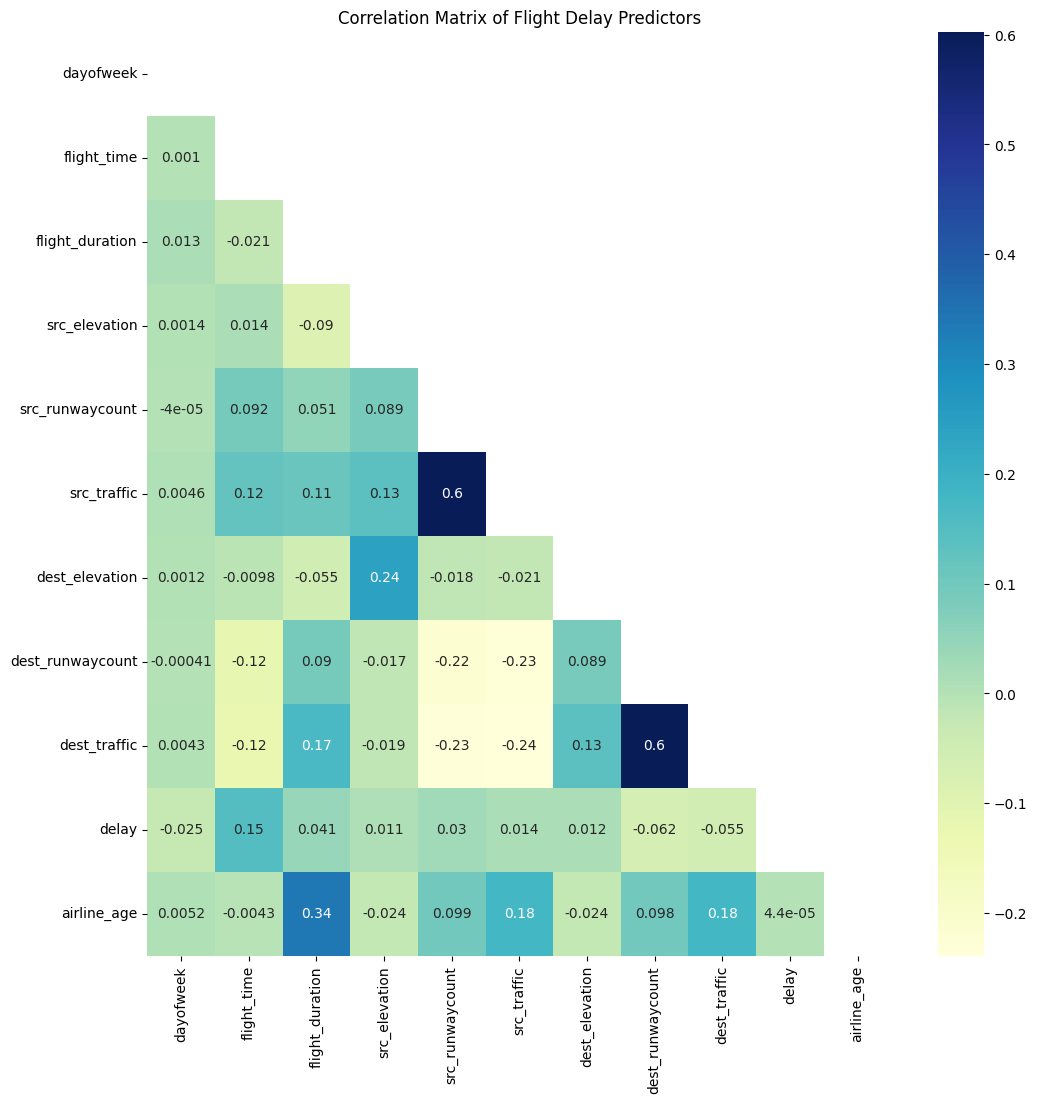

In [191]:
fig, ax = plt.subplots(figsize=(12,12))

# creating a mask
mask = np.triu(np.ones_like(airline_df[airline_num_col].corr().corr()))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(airline_df[airline_num_col].corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.title('Correlation Matrix of Flight Delay Predictors')

# displaying heatmap
plt.show()

High Impact Predictors on Flight Delay

# Machine Learning

1. Use OneHotEncoder and OrdinalEncoder to deal with categorical variables

2. Perform the following model-building steps:

2.a Split data into train and test


2.b.Standardize data

2.c. Apply logistic regression (use stochastic gradient descent optimizer) and decision tree models <br>
Note: Make sure you use standardization effectively, ensuring no data leakage and leverage
pipelines to have a cleaner cod

 2.d. Check the accuracy report of the model on the train and test data

2.e. Take care of overfitting of decision tree model <br>



2.f. The final prediction will rely on the majority class voted by five models generated through the
stratified five-fold method.

2.g. Compare the results of logistic regression and decision tree classifier


3. Build and validate the models using the Gradient Boosting classifier, compare all methods, and share your findings